<a href="https://colab.research.google.com/github/danielrivaldo27/Case-Study-03-Data-Mining---Association-Rule-Market-Basket-Analysis---Ganjil-2022---Kelompok-G/blob/main/Data_Mining_03_Association_Rule_Kelompok_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Case Study* 03 - *Association Rule* (*Market Basket Analysis*) - Kelompok G - *Data Mining***

1. Annisa Fairuz Zahira (2006571015)
2. Daniel Rivaldo Haryanto (2006534890)
3. Nicholas Sky Salvatio (2006532701)
4. Inez Aurellia Rosyana (2006571204)
5. Olivia Felica Utomo (2006464114)
6. Owen Susanto (2006570933)
7. Widyadari Dhiya Parahita (2006572913)

# ***Import Dataset***

In [86]:
import pandas as pd

In [87]:
url = 'https://github.com/widyadaridhyp/Data-Mining/blob/d0a2d3328bd4f13c7fd588ce03d1b287cb2506aa/Association_Rule.xlsx?raw=true'
df = pd.read_excel(url)

In [88]:
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,2022-07-01,Mr. A,1,Roti,Sri Roti,2
1,1,2022-07-01,Mr. A,2,Air Minum,Aquos,1
2,1,2022-07-01,Mr. A,11,Mie Instan,Indomi,2
3,1,2022-07-01,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,2022-07-01,Mr. B,2,Air Minum,Aquos,1
5,2,2022-07-01,Mr. B,6,Snack,Chiki,2
6,2,2022-07-01,Mr. B,3,Roti,Prambanan,1
7,2,2022-07-01,Mr. B,5,Shampoo,Clean,1
8,3,2022-07-02,Mr. C,4,Sabun,Lifboy,1
9,3,2022-07-02,Mr. C,5,Shampoo,Clean,1


Menurut kelompok kami, data yang diberikan oleh perusahaan AlfaIndo kurang informatif karena jumlah datanya yang sedikit dan tanggal yang tidak konsisten, sehingga interpretasi yang kami berikan nanti mungkin tidak bisa mewakili kondisi yang sesungguhnya terjadi.

In [89]:
!pip install mlxtend
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

# ***Pre-Processing***

Sebagian kecil *pre-processing* telah dilakukan di Microsoft Excel, seperti mengisi sel tabel yang kosong.

In [91]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# ***Exploratory Data Analysis***

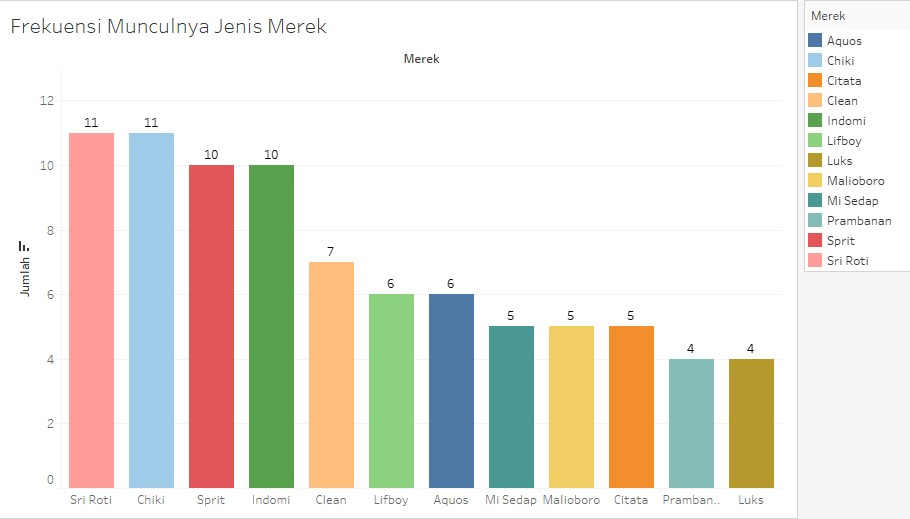

Dari hasil visualisasi di atas, jenis roti dari merek Sri Roti dan Prambanan memiliki frekuensi penjualan yang relatif berbeda. Sari Roti terjual 11 barang sedangkan Prambanan hanya terjual 4 barang. Hal ini bisa jadi mengindikasikan bahwa pembeli memiliki preferensi tertentu dalam membeli roti. AlfaIndo dapat mempertimbangkan untuk meletakkan *display* produk Prambanan di dekat kasir yang mana merupakan tempat yang pasti akan dikunjungi oleh pembeli sehingga pembeli dapat mempertimbangkan untuk membeli produk tersebut. Cara lainnya yaitu metode tebus murah, konsumen bertransaksi dengan nilai tertentu dapat membeli produk dengan harga yang lebih murah.

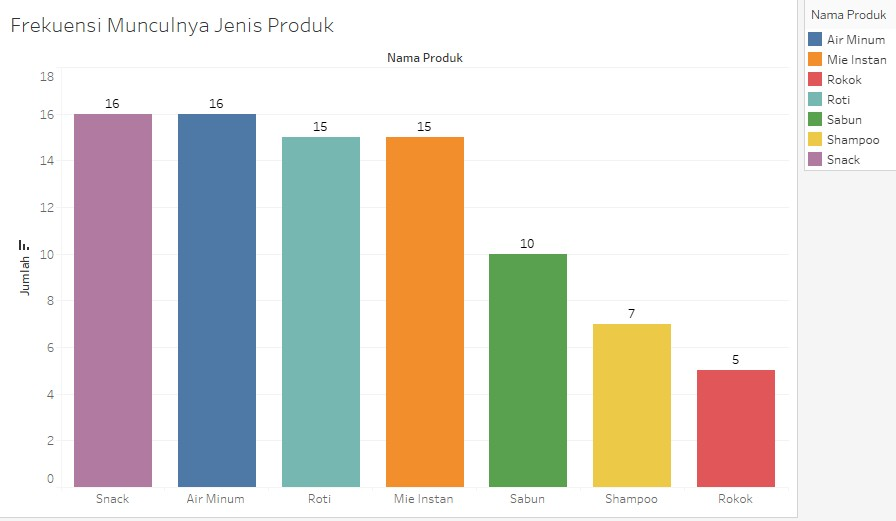

Dari hasil visualisasi di atas, frekuensi barang yang paling banyak dibeli oleh pembeli adalah dari jenis makanan dan minuman. Hal ini dapat menjadi pertimbangan untuk AlfaIndo untuk meningkatkan promosi kombinasi antara makanan dan minuman dengan barang lainnya. \\
Contoh: Setiap pembelian roti dengan jumlah tertentu bisa membeli sabun dengan harga yang lebih murah.

# ***Data Transformation***

## Berdasarkan Jenis Produk

### *Groupby*

In [93]:
basket = df.groupby(['ID Transaksi','Nama Produk'])['Jumlah'].count().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1.0,2.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### *Setting to Binary Values*

In [94]:
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,1,0,1,0,0,0
2,1,0,0,1,0,1,1
3,0,0,1,0,1,1,0
4,1,1,0,1,1,0,1
5,1,0,0,0,0,0,1


## Berdasarkan Merek

### *Groupby*

In [95]:
basket2 = df.groupby(['ID Transaksi','Merek'])['Jumlah'].count().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket2.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### *Setting to Binary Values*

In [96]:
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

basket2_sets = basket2.applymap(encode_units)
basket2_sets.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0,0,1
2,1,1,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,1,1
5,0,1,0,0,0,0,0,0,0,0,1,0


# ***Data Mining***

## Berdasarkan Jenis Produk

In [97]:
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.611111,(Air Minum)
1,0.333333,(Mie Instan)
2,0.277778,(Rokok)
3,0.500000,(Roti)
4,0.444444,(Sabun)
5,0.333333,(Shampoo)
6,0.500000,(Snack)
7,0.166667,"(Air Minum, Mie Instan)"
8,0.111111,"(Air Minum, Rokok)"
9,0.444444,"(Air Minum, Roti)"


In [98]:
rules1 = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Air Minum),(Roti),0.611111,0.500000,0.444444,0.727273,1.454545,0.138889,1.833333
1,(Roti),(Air Minum),0.500000,0.611111,0.444444,0.888889,1.454545,0.138889,3.500000
2,(Snack),(Air Minum),0.500000,0.611111,0.388889,0.777778,1.272727,0.083333,1.750000
3,(Air Minum),(Snack),0.611111,0.500000,0.388889,0.636364,1.272727,0.083333,1.375000
4,(Mie Instan),(Roti),0.333333,0.500000,0.166667,0.500000,1.000000,0.000000,1.000000


In [99]:
results1 = rules1[(rules1['lift'] >= 1) &
                  (rules1['confidence'] >= 0.8)]
aprresult1 = results1.head()

print('Melihat lift dari yang paling tinggi')
aprresult1_asc = results1.sort_values(by='lift', ascending=False).head()
display(aprresult1_asc)

print('\n\n\nMelihat lift dari yang paling rendah')
aprresult1_desc = results1.sort_values(by='lift', ascending=True).head()
display(aprresult1_desc)

print('\n\n\nMelihat consequent support dari yang paling tinggi')
aprresult1_conssupdesc = results1.sort_values(by='consequent support', ascending=False).head()
display(aprresult1_conssupdesc)

print('\n\n\nMelihat consequent support dari yang paling rendah')
aprresult1_conssupasc = results1.sort_values(by='consequent support', ascending=True).head()
display(aprresult1_conssupasc)

print('\n\n\nMelihat antecedent support dari yang paling tinggi')
aprresult1_antsupdesc = results1.sort_values(by='antecedent support', ascending=False).head()
display(aprresult1_antsupdesc)

print('\n\n\nMelihat antecedent support dari yang paling rendah')
aprresult1_antsupasc = results1.sort_values(by='antecedent support', ascending=True).head()
display(aprresult1_antsupasc)

print('\n\n\nMelihat support dari yang paling tinggi')
aprresult1_supdesc = results1.sort_values(by='support', ascending=False).head()
display(aprresult1_supdesc)

print('\n\n\nMelihat support dari yang paling rendah')
aprresult1_supasc = results1.sort_values(by='support', ascending=True).head()
display(aprresult1_supasc)

Melihat lift dari yang paling tinggi


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
156,"(Snack, Mie Instan, Roti)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
154,"(Snack, Air Minum, Mie Instan)","(Sabun, Roti)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
157,"(Sabun, Air Minum, Mie Instan)","(Snack, Roti)",0.111111,0.333333,0.111111,1.0,3.000000,0.074074,inf
125,"(Sabun, Air Minum)","(Snack, Roti)",0.166667,0.333333,0.166667,1.0,3.000000,0.111111,inf
159,"(Sabun, Mie Instan, Roti)","(Snack, Air Minum)",0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf





Melihat lift dari yang paling rendah


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Roti),(Air Minum),0.500000,0.611111,0.444444,0.888889,1.454545,0.138889,3.5
148,"(Snack, Sabun, Mie Instan, Roti)",(Air Minum),0.111111,0.611111,0.111111,1.000000,1.636364,0.043210,inf
119,"(Snack, Sabun, Roti)",(Air Minum),0.166667,0.611111,0.166667,1.000000,1.636364,0.064815,inf
80,"(Sabun, Mie Instan, Roti)",(Air Minum),0.111111,0.611111,0.111111,1.000000,1.636364,0.043210,inf
39,"(Snack, Roti)",(Air Minum),0.333333,0.611111,0.333333,1.000000,1.636364,0.129630,inf





Melihat consequent support dari yang paling tinggi


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Roti),(Air Minum),0.500000,0.611111,0.444444,0.888889,1.454545,0.138889,3.5
35,"(Sabun, Roti)",(Air Minum),0.166667,0.611111,0.166667,1.000000,1.636364,0.064815,inf
119,"(Snack, Sabun, Roti)",(Air Minum),0.166667,0.611111,0.166667,1.000000,1.636364,0.064815,inf
92,"(Snack, Mie Instan, Roti)",(Air Minum),0.111111,0.611111,0.111111,1.000000,1.636364,0.043210,inf
80,"(Sabun, Mie Instan, Roti)",(Air Minum),0.111111,0.611111,0.111111,1.000000,1.636364,0.043210,inf





Melihat consequent support dari yang paling rendah


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
156,"(Snack, Mie Instan, Roti)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
154,"(Snack, Air Minum, Mie Instan)","(Sabun, Roti)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
125,"(Sabun, Air Minum)","(Snack, Roti)",0.166667,0.333333,0.166667,1.0,3.000000,0.111111,inf
157,"(Sabun, Air Minum, Mie Instan)","(Snack, Roti)",0.111111,0.333333,0.111111,1.0,3.000000,0.074074,inf
159,"(Sabun, Mie Instan, Roti)","(Snack, Air Minum)",0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf





Melihat antecedent support dari yang paling tinggi


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Roti),(Air Minum),0.500000,0.611111,0.444444,0.888889,1.454545,0.138889,3.500000
38,"(Snack, Air Minum)",(Roti),0.388889,0.500000,0.333333,0.857143,1.714286,0.138889,3.500000
15,(Shampoo),(Sabun),0.333333,0.444444,0.277778,0.833333,1.875000,0.129630,3.333333
39,"(Snack, Roti)",(Air Minum),0.333333,0.611111,0.333333,1.000000,1.636364,0.129630,inf
7,(Mie Instan),(Sabun),0.333333,0.444444,0.277778,0.833333,1.875000,0.129630,3.333333





Melihat antecedent support dari yang paling rendah


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
92,"(Snack, Mie Instan, Roti)",(Air Minum),0.111111,0.611111,0.111111,1.0,1.636364,0.043210,inf
156,"(Snack, Mie Instan, Roti)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
154,"(Snack, Air Minum, Mie Instan)","(Sabun, Roti)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
150,"(Sabun, Air Minum, Mie Instan, Roti)",(Snack),0.111111,0.500000,0.111111,1.0,2.000000,0.055556,inf
149,"(Snack, Air Minum, Mie Instan, Roti)",(Sabun),0.111111,0.444444,0.111111,1.0,2.250000,0.061728,inf





Melihat support dari yang paling tinggi


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Roti),(Air Minum),0.500000,0.611111,0.444444,0.888889,1.454545,0.138889,3.500000
38,"(Snack, Air Minum)",(Roti),0.388889,0.500000,0.333333,0.857143,1.714286,0.138889,3.500000
39,"(Snack, Roti)",(Air Minum),0.333333,0.611111,0.333333,1.000000,1.636364,0.129630,inf
15,(Shampoo),(Sabun),0.333333,0.444444,0.277778,0.833333,1.875000,0.129630,3.333333
7,(Mie Instan),(Sabun),0.333333,0.444444,0.277778,0.833333,1.875000,0.129630,3.333333





Melihat support dari yang paling rendah


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
92,"(Snack, Mie Instan, Roti)",(Air Minum),0.111111,0.611111,0.111111,1.0,1.636364,0.043210,inf
156,"(Snack, Mie Instan, Roti)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
154,"(Snack, Air Minum, Mie Instan)","(Sabun, Roti)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
150,"(Sabun, Air Minum, Mie Instan, Roti)",(Snack),0.111111,0.500000,0.111111,1.0,2.000000,0.055556,inf
149,"(Snack, Air Minum, Mie Instan, Roti)",(Sabun),0.111111,0.444444,0.111111,1.0,2.250000,0.061728,inf


* Dengan melihat banyaknya merek yang terjual, AlfaIndo dapat membentuk sebuah *campaign promo* dengan tema "Save Yourself and Your Money". Promo ini bisa digunakan pada era *new normal*, seperti saat ini dan ditujukan untuk para mahasiswa dengan menggabungkan barang-barang yang memiliki nilai *lift* yang tinggi seperti mie instan, sabun, snack, dan roti. \\
Kami merekomendasikan paket dengan merek Lifboy, Aquos, Mie Sedap, Citata, dan Sari Roti.

* Jika melihat dari *overview* data, produk yang paling banyak terjual adalah jenis snack, air minum, roti, dan mie instan. Strategi yang dapat AlfaIndo lakukan untuk membuat pelanggan membeli lebih banyak produk adalah dengan meletakkan barang-barang yang laku saling berjauhan. Contohnya dengan meletakkan produk snack, air minum, roti, dan mie instan di sudut-sudut toko agar pembeli dapat berkeliling sambil melihat produk lainnya.

* Selain itu, untuk 'menyiasati' konsumen yang tidak mengelilingi toko, Alfaindo dapat mengumpulkan barang-barang promosi, seperti barang promo dan produk *campaign*, di satu tempat yang mudah dilihat dari pintu masuk, seperti depan pintu masuk.

In [100]:
apr_result1['antecedents'].value_counts()

(Sabun, Air Minum)                       3
(Sabun, Mie Instan, Roti)                3
(Sabun, Roti)                            3
(Snack, Mie Instan, Roti)                3
(Snack, Air Minum, Mie Instan)           3
(Sabun, Air Minum, Mie Instan)           3
(Roti)                                   1
(Snack, Air Minum, Mie Instan, Roti)     1
(Mie Instan, Shampoo)                    1
(Air Minum, Mie Instan)                  1
(Sabun, Air Minum, Mie Instan, Roti)     1
(Snack, Sabun, Air Minum, Mie Instan)    1
(Snack, Sabun, Air Minum)                1
(Sabun, Air Minum, Roti)                 1
(Snack, Sabun, Mie Instan, Roti)         1
(Shampoo)                                1
(Mie Instan)                             1
(Snack, Air Minum)                       1
(Mie Instan, Roti)                       1
(Snack, Roti)                            1
(Snack, Sabun, Roti)                     1
(Snack, Mie Instan)                      1
Name: antecedents, dtype: int64

In [101]:
apr_result1['consequents'].value_counts()

(Air Minum)           8
(Roti)                7
(Sabun)               7
(Snack)               6
(Snack, Air Minum)    2
(Snack, Roti)         2
(Sabun, Roti)         1
(Sabun, Air Minum)    1
Name: consequents, dtype: int64

## Berdasarkan Merek

In [102]:
frequent_itemsets2 = apriori(basket2_sets, min_support=0.1, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.277778,(Aquos)
1,0.388889,(Chiki)
2,0.111111,(Citata)
3,0.333333,(Clean)
4,0.277778,(Indomi)
5,0.277778,(Lifboy)
6,0.166667,(Luks)
7,0.277778,(Malioboro)
8,0.166667,(Mi Sedap)
9,0.166667,(Prambanan)


In [103]:
rules2 = association_rules(frequent_itemsets2, metric='lift', min_threshold=1)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Aquos),(Chiki),0.277778,0.388889,0.166667,0.600000,1.542857,0.058642,1.527778
1,(Chiki),(Aquos),0.388889,0.277778,0.166667,0.428571,1.542857,0.058642,1.263889
2,(Aquos),(Indomi),0.277778,0.277778,0.111111,0.400000,1.440000,0.033951,1.203704
3,(Indomi),(Aquos),0.277778,0.277778,0.111111,0.400000,1.440000,0.033951,1.203704
4,(Lifboy),(Aquos),0.277778,0.277778,0.111111,0.400000,1.440000,0.033951,1.203704


In [104]:
results2 = rules2[(rules2['lift'] >= 1) &
                  (rules2['confidence'] >= 0.8)]
aprresult2 = results2.head()

print('Melihat lift dari yang paling tinggi')
aprresult2_asc = results2.sort_values(by='lift', ascending=False).head()
display(aprresult2_asc)

print('\n\n\nMelihat lift dari yang paling rendah')
aprresult2_desc = results2.sort_values(by='lift', ascending=True).head()
display(aprresult2_desc)

print('\n\n\nMelihat consequent support dari yang paling tinggi')
aprresult2_conssupdesc = results2.sort_values(by='consequent support', ascending=False).head()
display(aprresult2_conssupdesc)

print('\n\n\nMelihat consequent support dari yang paling rendah')
aprresult2_conssupasc = results2.sort_values(by='consequent support', ascending=True).head()
display(aprresult2_conssupasc)

print('\n\n\nMelihat antecedent support dari yang paling tinggi')
aprresult2_antsupdesc = results2.sort_values(by='antecedent support', ascending=False).head()
display(aprresult2_antsupdesc)

print('\n\n\nMelihat antecedent support dari yang paling rendah')
aprresult2_antsupasc = results2.sort_values(by='antecedent support', ascending=True).head()
display(aprresult2_antsupasc)

print('\n\n\nMelihat support dari yang paling tinggi')
aprresult2_supdesc = results2.sort_values(by='support', ascending=False).head()
display(aprresult2_supdesc)

print('\n\n\nMelihat support dari yang paling tinggi')
aprresult2_supasc = results2.sort_values(by='support', ascending=True).head()
display(aprresult2_supasc)

Melihat lift dari yang paling tinggi


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
99,"(Chiki, Sri Roti)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
94,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
96,"(Lifboy, Sri Roti)","(Aquos, Chiki)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
95,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
82,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf





Melihat lift dari yang paling rendah


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
73,"(Lifboy, Sri Roti)",(Chiki),0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf
91,"(Lifboy, Aquos, Sri Roti)",(Chiki),0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf
42,"(Lifboy, Aquos)",(Chiki),0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf
66,"(Clean, Luks)",(Chiki),0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf
90,"(Lifboy, Aquos, Chiki)",(Sri Roti),0.111111,0.333333,0.111111,1.0,3.000000,0.074074,inf





Melihat consequent support dari yang paling tinggi


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
73,"(Lifboy, Sri Roti)",(Chiki),0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf
42,"(Lifboy, Aquos)",(Chiki),0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf
91,"(Lifboy, Aquos, Sri Roti)",(Chiki),0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf
66,"(Clean, Luks)",(Chiki),0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf
68,"(Luks, Chiki)",(Clean),0.111111,0.333333,0.111111,1.0,3.000000,0.074074,inf





Melihat consequent support dari yang paling rendah


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
99,"(Chiki, Sri Roti)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
94,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
95,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
82,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
96,"(Lifboy, Sri Roti)","(Aquos, Chiki)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf





Melihat antecedent support dari yang paling tinggi


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Citata),(Sprit),0.111111,0.333333,0.111111,1.0,3.0,0.074074,inf
74,"(Chiki, Sri Roti)",(Lifboy),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf
96,"(Lifboy, Sri Roti)","(Aquos, Chiki)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
95,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
94,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf





Melihat antecedent support dari yang paling rendah


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Citata),(Sprit),0.111111,0.333333,0.111111,1.0,3.0,0.074074,inf
95,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
94,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
93,"(Aquos, Chiki, Sri Roti)",(Lifboy),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf
92,"(Lifboy, Chiki, Sri Roti)",(Aquos),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf





Melihat support dari yang paling tinggi


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Citata),(Sprit),0.111111,0.333333,0.111111,1.0,3.0,0.074074,inf
74,"(Chiki, Sri Roti)",(Lifboy),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf
96,"(Lifboy, Sri Roti)","(Aquos, Chiki)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
95,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
94,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf





Melihat support dari yang paling tinggi


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Citata),(Sprit),0.111111,0.333333,0.111111,1.0,3.0,0.074074,inf
95,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
94,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
93,"(Aquos, Chiki, Sri Roti)",(Lifboy),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf
92,"(Lifboy, Chiki, Sri Roti)",(Aquos),0.111111,0.277778,0.111111,1.0,3.6,0.080247,inf


Berdasarkan *overview* data (nilai *antecedent support*), pada sebagian besar transaksi selain membeli barang lain, pembeli juga membeli chiki. Hal ini bisa dijadikan pertimbangan bagi AlfaIndo agar menjadikan produk Chiki sebagai bonus pembelian barang yang kurang laku. \\
Contoh: Setiap pembelian Sampo atau Sabun dalam jumlah tertentu bisa mendapatkan gratis ciki

In [105]:
apr_result2['antecedents'].value_counts()

(Chiki, Sri Roti)            3
(Lifboy, Aquos)              3
(Lifboy, Sri Roti)           3
(Lifboy, Chiki)              3
(Citata)                     3
(Indomi, Sri Roti)           1
(Aquos, Chiki, Sri Roti)     1
(Lifboy, Chiki, Sri Roti)    1
(Citata, Sri Roti)           1
(Lifboy, Aquos, Chiki)       1
(Sprit, Citata)              1
(Luks, Chiki)                1
(Aquos, Indomi)              1
(Lifboy, Aquos, Sri Roti)    1
(Clean, Luks)                1
Name: antecedents, dtype: int64

In [106]:
apr_result2['consequents'].value_counts()

(Sri Roti)           6
(Aquos)              5
(Chiki)              4
(Lifboy)             2
(Sprit)              2
(Lifboy, Aquos)      1
(Chiki, Sri Roti)    1
(Aquos, Chiki)       1
(Aquos, Sri Roti)    1
(Sprit, Sri Roti)    1
(Clean)              1
Name: consequents, dtype: int64